/tmp/ipython-input-3-4014825427.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_train, x='Sentiment', palette='Set2')


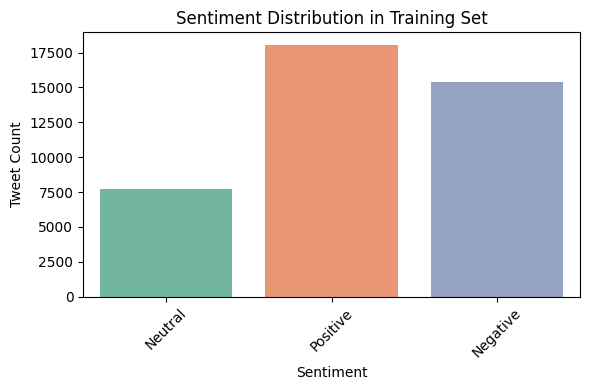

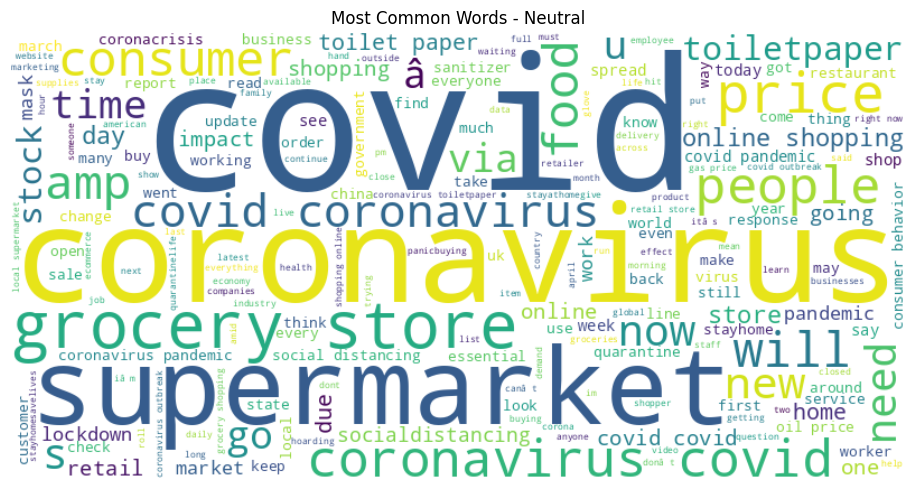

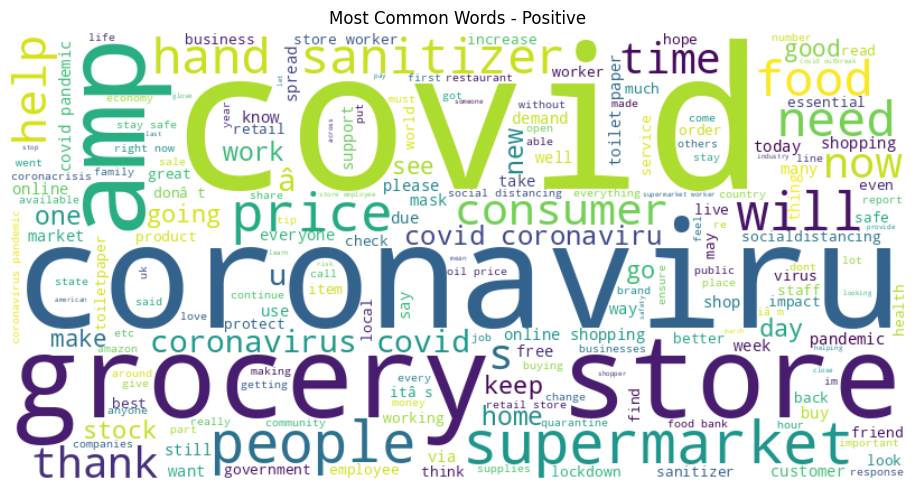

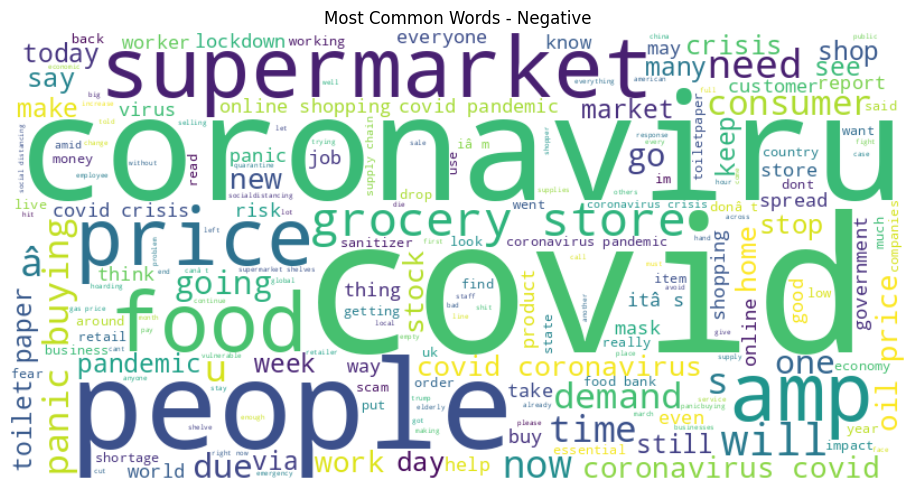


Classification Report:

              precision    recall  f1-score   support

    Negative       0.79      0.79      0.79      1633
     Neutral       0.69      0.56      0.62       619
    Positive       0.78      0.83      0.81      1546

    accuracy                           0.77      3798
   macro avg       0.75      0.73      0.74      3798
weighted avg       0.77      0.77      0.77      3798



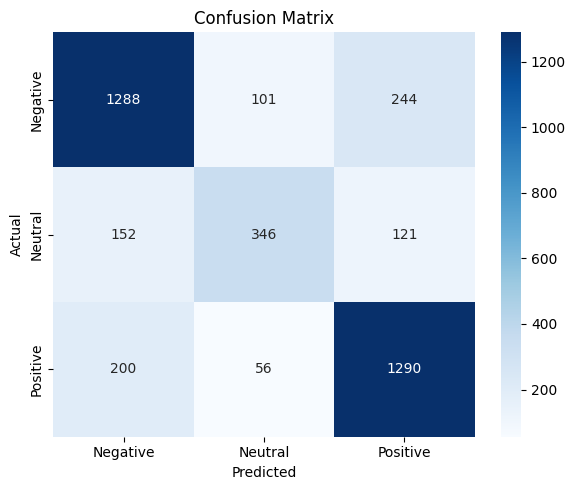

In [3]:
import pandas as pd
import numpy as np
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# ---------------------------
# 1. Load Data
# ---------------------------
train_df = pd.read_csv("Corona_NLP_train.csv", encoding="ISO-8859-1")
test_df = pd.read_csv("Corona_NLP_test.csv", encoding="ISO-8859-1")

df_train = train_df[['OriginalTweet', 'Sentiment']].copy()
df_test = test_df[['OriginalTweet', 'Sentiment']].copy()

# Normalize sentiment labels
sentiment_map = {
    "Extremely Negative": "Negative",
    "Extremely Positive": "Positive"
}
df_train['Sentiment'] = df_train['Sentiment'].replace(sentiment_map)
df_test['Sentiment'] = df_test['Sentiment'].replace(sentiment_map)

# ---------------------------
# 2. Clean Text
# ---------------------------
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)
    text = re.sub(r'@\w+|#', '', text)
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    return text.strip()

df_train['clean_text'] = df_train['OriginalTweet'].apply(clean_text)
df_test['clean_text'] = df_test['OriginalTweet'].apply(clean_text)

# ---------------------------
# 3. Visualize Sentiment Distribution
# ---------------------------
plt.figure(figsize=(6,4))
sns.countplot(data=df_train, x='Sentiment', palette='Set2')
plt.title("Sentiment Distribution in Training Set")
plt.xlabel("Sentiment")
plt.ylabel("Tweet Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ---------------------------
# 4. WordCloud per Sentiment
# ---------------------------
for sentiment in df_train['Sentiment'].unique():
    text = " ".join(df_train[df_train['Sentiment'] == sentiment]['clean_text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Most Common Words - {sentiment}")
    plt.tight_layout()
    plt.show()

# ---------------------------
# 5. TF-IDF Vectorization
# ---------------------------
tfidf = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train = tfidf.fit_transform(df_train['clean_text'])
X_test = tfidf.transform(df_test['clean_text'])

y_train = df_train['Sentiment']
y_test = df_test['Sentiment']

# ---------------------------
# 6. Train Model
# ---------------------------
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# ---------------------------
# 7. Predict and Evaluate
# ---------------------------
y_pred = model.predict(X_test)

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# ---------------------------
# 8. Confusion Matrix
# ---------------------------
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_test),
            yticklabels=np.unique(y_test))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()
